## Preliminary EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/reddit_complete.csv')

In [3]:
df.head()

,sub,title,score,comments,created
0,LeopardsAteMyFace,Did they really think he'd pay out?,20509,1031,2022-08-29 20:28:53
1,news,"China drought causes Yangtze to dry up, sparki...",19660,1546,2022-08-29 19:15:21
2,MadeMeSmile,He did it!,86623,871,2022-08-29 18:46:11
3,aww,Loving the water.,13717,112,2022-08-29 19:47:36
4,politics,Biden vows to crack down on colleges 'jacking ...,44057,2259,2022-08-29 18:28:16


In [4]:
df.shape

(16900, 5)

### The goal is to run a model based on the vectorization of the dataframes titles. Ideally, the title text alone will be strong enough to predict whether or not a reddit post's comments will rise above or fall below the comment median of our data.

### The data consists of:
- **Subreddit**: Where the post was originally posted
- **Title**: The title of the post
- **Score**: The number of 'upvotes' the post has
- **Comments**: The number of comments the post has
- **Created**: When the post was originally created
- **16900** posts were scrapped for observation

https://praw.readthedocs.io/en/latest/code_overview/models/submission.html

In [5]:
# checking nulls
df.isnull().sum()

sub         0
title       0
score       0
comments    0
created     0
dtype: int64

In [6]:
# checking data types
df.dtypes

sub         object
title       object
score        int64
comments     int64
created     object
dtype: object

### Inserting a column to indicate the length of the title. This should help better visualize the posts we are dealing with as potentially identify missing values that weren't noticed otherwise

In [7]:
title_length = [len(each) for each in df.title]

In [8]:
# inserting title lengths next to respective title
df.insert(2,'title_length',title_length)

In [9]:
df.head()

,sub,title,title_length,score,comments,created
0,LeopardsAteMyFace,Did they really think he'd pay out?,35,20509,1031,2022-08-29 20:28:53
1,news,"China drought causes Yangtze to dry up, sparki...",71,19660,1546,2022-08-29 19:15:21
2,MadeMeSmile,He did it!,10,86623,871,2022-08-29 18:46:11
3,aww,Loving the water.,17,13717,112,2022-08-29 19:47:36
4,politics,Biden vows to crack down on colleges 'jacking ...,125,44057,2259,2022-08-29 18:28:16


## EDA and Prepping Data For Modeling
- The objective is to observe distribution of the data 
- Notice outliers and handle appropriately
- Ensure data has no duplicate posts

In [10]:
df.describe()

,title_length,score,comments
count,16900.000000,16900.000000,16900.000000
mean,55.776213,23280.427574,544.865266
std,51.864715,53793.827393,1924.572484
min,1.000000,61.000000,0.000000
25%,22.000000,305.000000,15.000000
50%,40.000000,719.000000,46.000000
75%,71.000000,3031.000000,187.000000
max,300.000000,467439.000000,82153.000000


### Noticing the minimum amount of comments is 0, we can assume this is either due to the original creator of the post removing the ability to add comments, or because the post is still new that it hasn't been commented on yet

In [11]:
df[df.comments == 0]

,sub,title,title_length,score,comments,created
1407,milanavayntrub,Cutie at a yahoo event,22,205,0,2022-08-29 22:23:42
1979,DontSubscribeDumbAss,"UNBG. 🛻 Hey, Optimus Prime! 🛻 🚚",31,729,0,2022-08-29 13:44:25
2157,kpics,Joy,3,327,0,2022-08-29 17:41:37
2295,Catmemes,Vibe,4,164,0,2022-08-29 21:04:57
2381,Sadiesink,Doing her happy dance!,22,104,0,2022-08-29 23:14:36
...,...,...,...,...,...,...
16317,formuladank,When you're fighting with your brother and you...,68,162,0,2022-09-01 15:20:51
16576,tumblr,id give it to him on the house,30,254,0,2022-09-01 12:16:34
16690,memes,So true,7,274,0,2022-09-01 16:03:25
16840,memes,I do not own a cat...,21,128,0,2022-09-01 16:29:14


### There are only 89 posts that do not have comments, we can simply continue without these posts since our model will perform based on the median number of comments on a post

In [12]:
# Assigning to not equals zero instead of greater than to inspect any unexpected results that may show up
df = df[df.comments != 0]

In [13]:
df.shape

(16811, 6)

In [14]:
df.describe()

,title_length,score,comments
count,16811.000000,16811.000000,16811.000000
mean,55.929154,23393.925049,547.749866
std,51.944471,53902.211647,1929.251075
min,1.000000,61.000000,1.000000
25%,22.000000,308.000000,16.000000
50%,40.000000,728.000000,47.000000
75%,71.000000,3062.000000,189.000000
max,300.000000,467439.000000,82153.000000


#### Now the minimum amount of comments on a post is 1
- Lets look into the distribution of our data further
- We will scale comments and score due to disparity in both features 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

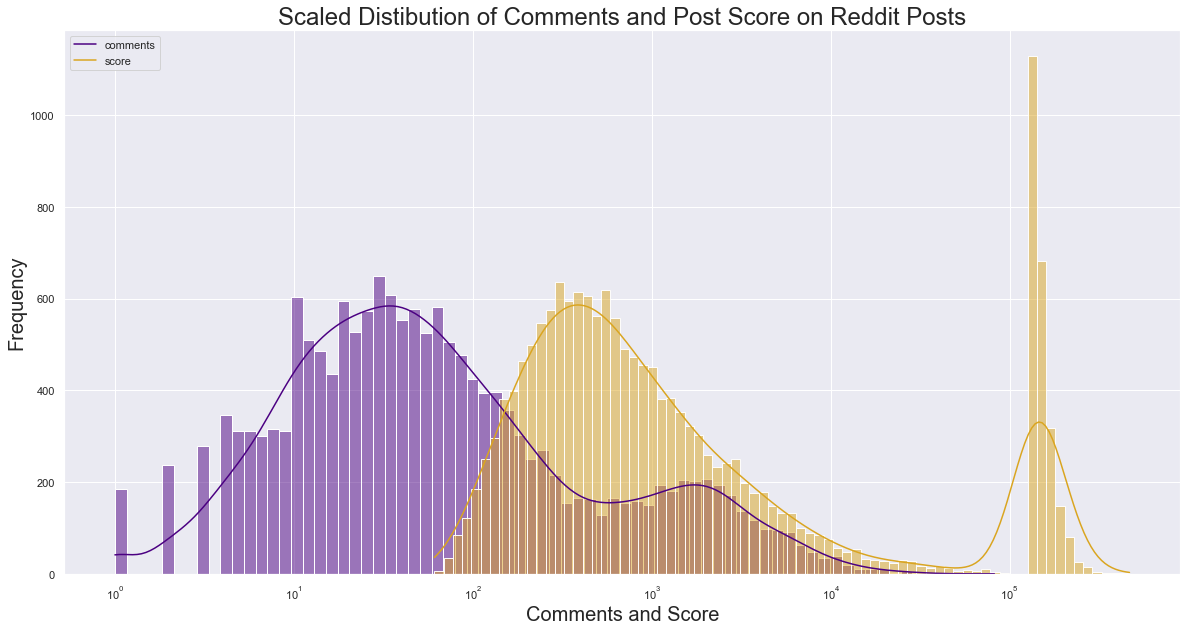

In [17]:
ax = sns.histplot(df.comments,log_scale=True,
             kde=True,color='indigo',bins=75)

sns.histplot(df.score,color='goldenrod',
             log_scale=True,kde=True,bins=75);

sns.set(rc = {'figure.figsize':(20,10)});

ax.set_title('Scaled Distibution of Comments and Post Score on Reddit Posts',
             fontsize=24)
ax.set_xlabel('Comments and Score', fontsize=20);
ax.set_ylabel('Frequency', fontsize=20);

plt.legend(loc='upper left', labels=['comments','score']);

**Comments**
- The distribution of comments depicts abnormal data for posts with lower comment totals. There are several gaps in the distribution of posts with lower comment totals that are worth looking into. Overall, the distrubtion of comments is skewed right and posts that have anywhere between 500-600 comments appear the most in the data set.
- As of now:
    - `Mean: 547 comments`
    - `Median: 47 comments`
- The disparity between mean and median may have to be addressed if the model is to run effeciently.
 
**Scores**
- There are no posts with a score below 61 in our data. Aside from a volatile spike in scores over 100,000 the distribution of scores remains skewed right. Majority of posts have scores ranging between 500-800. 
- As of now:
    - `Mean: 23,393`
    - `Median: 727`
- The volatile spike disrupts the average of our scores. This spike is due to user quality error. In order to get enough reddit posts for our data, Reddits "top posts of all time" were scrapped as well. The influx of posts with scores over 100,000 are more than likely from the pool of all time posts. Interestingly, the same spike does not occur when looking at comments.
- We will examine the data further to determine if these are outliers we want to get rid of. As we see just below, while posts with scores over 100,000 were likely scrapped from Reddits 'top posts all time' is not always true

In [18]:
df[df.score > 100_000].sort_values(by='created',ascending=False).head()

,sub,title,title_length,score,comments,created
15656,MadeMeSmile,"Jack Gleeson, who played King Joffrey on “Game...",150,177732,4413,2022-09-01 00:38:41
15076,aww,Petting the hands of an otter,29,128066,1518,2022-08-31 22:08:46
9519,pics,A rare African black leopard under the stars -...,87,154511,1831,2021-03-02 12:16:32
7399,gaming,boy gamer,9,220473,6597,2021-03-01 15:41:09
8444,memes,Nobody gives a fuck!,20,148348,1648,2021-03-01 12:51:25


### We don't need to scale the distribution of title lengths for our reddit posts as the distribution is legible as is

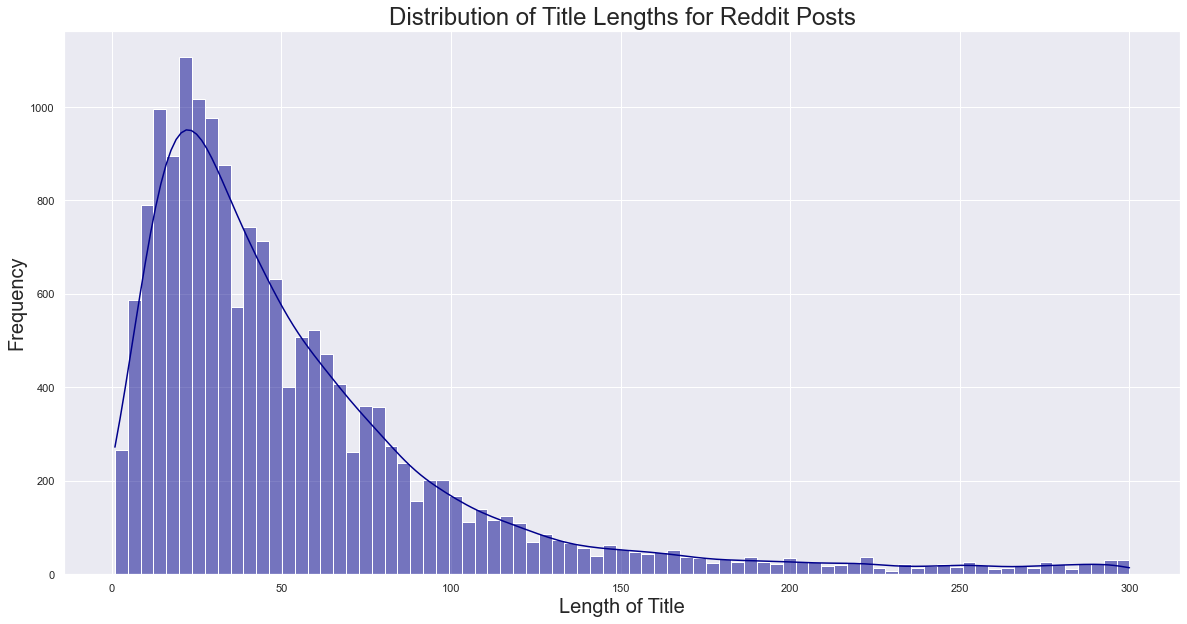

In [19]:
ax = sns.histplot(df.title_length,log_scale=False,
                  kde=True,color='darkblue')
sns.set(rc = {'figure.figsize':(20,8)});

ax.set_title('Distribution of Title Lengths for Reddit Posts',fontsize=24)
ax.set_xlabel('Length of Title', fontsize = 20);
ax.set_ylabel('Frequency', fontsize=20);

**Title Length**
- The distribution of title lenghts is skewed right. Most posts have a title length between 30-60 characters. It is worth noting our title length does count spaces as part of the length.
- As of now:
    - `Mean Length: 56 characters`
    - `Median Length: 40 characters`

## Checking relationships between data

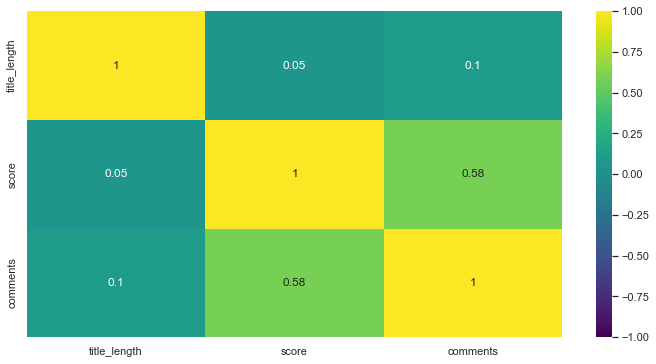

In [21]:
sns.heatmap(df.corr(),cmap='viridis',vmin = -1,annot=True);

sns.set(rc = {'figure.figsize':(12,6)});

In [22]:
df.corr().sort_values(by='score')

,title_length,score,comments
title_length,1.000000,0.049844,0.100559
comments,0.100559,0.584556,1.000000
score,0.049844,1.000000,0.584556


### There is a noticeably strong relationship between score and comments

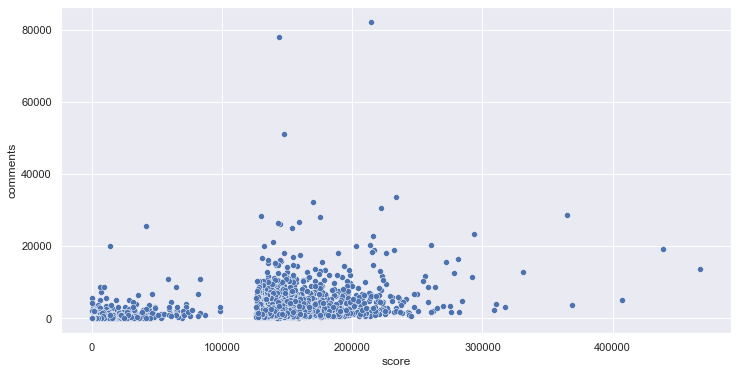

In [23]:
sns.scatterplot(x=df.score,y=df.comments);

#### There is a linear relationship between score and comments. As comments or score increases, the other is expected to increase as well. This shouldn't affect our model as we aren't using score as a feature. Additionally, the spike we saw when viewing the distribution of scores and not seeing that same spike in comments is further seen here. There are only 3 posts which comments exceed 4000 and the majority of posts do not exceed 2000 comments

## Examining The Posts with Fewer Comments

In [24]:
df[df.comments < 100].sort_values(by='created').head()

,sub,title,title_length,score,comments,created
7863,pics,Censorship Bad,14,158145,2,2019-08-21 23:48:48
8620,WhitePeopleTwitter,Shots have been fired (metaphorically of course),48,142255,94,2020-11-06 18:14:13
4676,DunderMifflin,The Only Guilty Man in Shawshank,32,10287,98,2022-08-29 01:24:20
3915,Political_Revolution,Bernie is tired of your shit,28,5404,83,2022-08-29 01:27:55
6915,Hololive,[Baelz] Strategic Dialogue Box Placement,40,5283,60,2022-08-29 01:28:53


#### Today's Date: 9/1/22

#### The Histogram of comments displayed strange gaps on posts with around 70 or fewer comments. When investigating I decided to round up to 100 comments to ensure I don't miss any abnormalities. 

#### By viewing posts with comments under 100 associated with the date the post was created, we can see that there are only two posts that weren't created within the past week. Of those two posts, one which was created in 2020, has only two comments and is apart of the volatile spike in the scores greater than 100_000 represented on the scores histogram. We are going to remove this post from the data because based on the score, this post performed very well. The text of the post, while only two words "Censorship Bad" is important to remove as we don't want the model to believe this is performing poorly when according to the score, it is not. This appears to be an instance of the creator of the post disallowing comments.

#### Realistically, removing this one post from this large data set won't have an immediate impact however as we continue to remove unwanted data, hopefully we do see an impact

In [25]:
df.drop(index=7863,inplace=True)

###  Viewing posts under the 25th percentile (16 comments) and a score greater than the 75th percentile (3061)

In [26]:
df.loc[(df.comments < 16) & (df.score > 3061)]

,sub,title,title_length,score,comments,created
185,gravityfalls,This was just the perfect way to introduce her,46,3075,15,2022-08-29 17:06:18
455,wholesomegreentext,"I don’t know if this is all that wholesome, bu...",77,4352,8,2022-08-29 11:43:49
463,OTMemes,So uncivilized,14,4900,9,2022-08-29 11:32:33
2193,whenthe,"I sure will, Officer🤗",21,3088,12,2022-08-29 13:39:30
3218,MinecraftMemes,Me when I found out it doesn't listen to what ...,56,3819,15,2022-08-29 10:45:40
4012,marvelmemes,send it....,11,5559,14,2022-08-29 09:14:59
4164,blursedimages,Blursed Firecracker.,20,3306,15,2022-08-29 10:56:03
4364,lotrmemes,And they all turned to look at him,34,4785,15,2022-08-29 10:49:24
5109,wholesomememes,It's a D-ino-ecoration,22,5754,15,2022-08-29 10:15:20
5931,marvelmemes,The years haven't been kind to you Bruce,40,5980,10,2022-08-29 02:41:51


### For now I am hesitant to drop any columns under vague criteria as these are all new posts. We will run return to the data if we find our model isn't performing ideally. 

### What is noticed however is there are non alpha-numeric characters in the title text as well as emojis. We will be getting rid of any posts with non alpha-numeric characters. We will also get rid of any posts with emojis in our title text, though we may return to keep posts with emojis later if we believe they can be useful.

## Non Alpha-Numeric Characters

In [27]:
# Getting rid of nonalphanumeric text first
df = df[df.title.str.contains(r'[^0-9a-zA-Z]')]

# emoji's were strange to deal with so we will create a new column which strips
# our title of any emojis
df['no_emoji'] = df.title.apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# dropping rows where title has emojis by keeping only titles that are equal to non-emoji equivalent
df = df.iloc[np.where(df.title == df.no_emoji)]

# dropping our no longer needed extra column
df.drop(columns=['no_emoji'],inplace=True)

In [28]:
df.head()

,sub,title,title_length,score,comments,created
0,LeopardsAteMyFace,Did they really think he'd pay out?,35,20509,1031,2022-08-29 20:28:53
1,news,"China drought causes Yangtze to dry up, sparki...",71,19660,1546,2022-08-29 19:15:21
2,MadeMeSmile,He did it!,10,86623,871,2022-08-29 18:46:11
3,aww,Loving the water.,17,13717,112,2022-08-29 19:47:36
4,politics,Biden vows to crack down on colleges 'jacking ...,125,44057,2259,2022-08-29 18:28:16


In [29]:
df.shape

(13488, 6)

## Dealing with duplicate titles:
- A common theme with a popular post is posting the same post to multiple subreddits.
- If the post is popular enough, the same post from multiple subreddits will reach the front page
- We haven't dropped these yet but it is important to do so

In [30]:
# identifying duplicate titles
df[df.title.duplicated() ==True]

,sub,title,title_length,score,comments,created
259,megalophobia,Burning Man Festival,20,10400,735,2022-08-29 10:51:26
393,Fuckthealtright,It's true and it's not a coincidence,36,2298,39,2022-08-29 15:13:53
597,me_irl,me_irl,6,2667,34,2022-08-29 16:48:14
600,toptalent,He makes this technique look so easy.,37,3903,59,2022-08-29 10:59:40
603,reallifedoodles,When Water Goes Bad,19,1790,28,2022-08-29 14:50:42
...,...,...,...,...,...,...
16759,politics,U.S. judge declines to rule now on Trump reque...,67,128,70,2022-09-01 19:11:30
16786,memes,Poor Americans,14,1310,37,2022-09-01 05:16:25
16791,politics,Oath Keepers' lawyer arrested in connection wi...,55,95,16,2022-09-01 19:57:53
16807,memes,Is it really true?,18,140,28,2022-09-01 16:30:30


In [31]:
# dropping all duplicates aside from the default first occurrence
df = df.drop_duplicates(subset='title', keep='first')

In [32]:
df.shape

(12906, 6)

## Other non-discernable titles
- Lastly we will be getting rid of titles with a length less than 4. A title length of 4, while only one word, can be a titled such as "HOW?!" and can be sufficient enough to capture whatever content the post contains allowing the post to score well

In [33]:
df = df[df.title_length > 4]

In [34]:
df.shape

(12875, 6)

## Creating Target Column

### Creating dummy column indicating whether or not a post is above or below the median comments. 
- We will use this column as our target

In [35]:
df.describe()

,title_length,score,comments
count,12875.000000,12875.000000,12875.000000
mean,54.642796,26431.890252,605.851262
std,48.062904,56702.409523,2065.753663
min,5.000000,61.000000,1.000000
25%,23.000000,317.000000,16.000000
50%,40.000000,784.000000,50.000000
75%,68.000000,3798.000000,226.000000
max,300.000000,467439.000000,82153.000000


## Establishing Baseline

In [36]:
# The median of comments is 50
df['above_median'] = [1 if each > 50 else 0 for each in df.comments]

In [37]:
# Our target baseline is 50 comments 
# There is a near 50/50 split for posts which have more or less than 50 comments per post
# We are attempting to predict whether or not a post will have above or below 50 comments
df.above_median.value_counts(normalize=True)

0    0.502136
1    0.497864
Name: above_median, dtype: float64

## Train Test Split

In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error, f1_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

In [132]:
X = df['title']

y = df.above_median

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)

In [40]:
X_train.shape, X_test.shape

((9656,), (3219,))

In [41]:
# Still 50/50 as expected
y_train.value_counts(normalize=True)

0    0.502175
1    0.497825
Name: above_median, dtype: float64

In [42]:
# Still 50/50 as expected
y_test.value_counts(normalize=True)

0    0.502019
1    0.497981
Name: above_median, dtype: float64

# Modeling:
- The first models will run with minimal hyperparameter tuning and no use of pipeline.
- The purpose of interpreting the first few models with minimal hyperparameter tuning is to learn where the models need improvement as well as to visualize interpretations.
- Once we understand where improvement is needed, we can run models with appropriate hyerparameters

## First Model 
### Using Count Vectorizer

In [43]:
# First model will run with the only hyperparameter being stop_words
# We want all words to be lowercase to ensure all stop_words are captured
cv = CountVectorizer(stop_words='english')

cv.fit(X_train)

X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test) 

In [44]:
X_train_cv.shape, X_test_cv.shape

((9656, 15752), (3219, 15752))

In [45]:
# creating DataFrame of our features
df_trial_1 = pd.DataFrame(X_train_cv.A, columns=cv.get_feature_names_out())

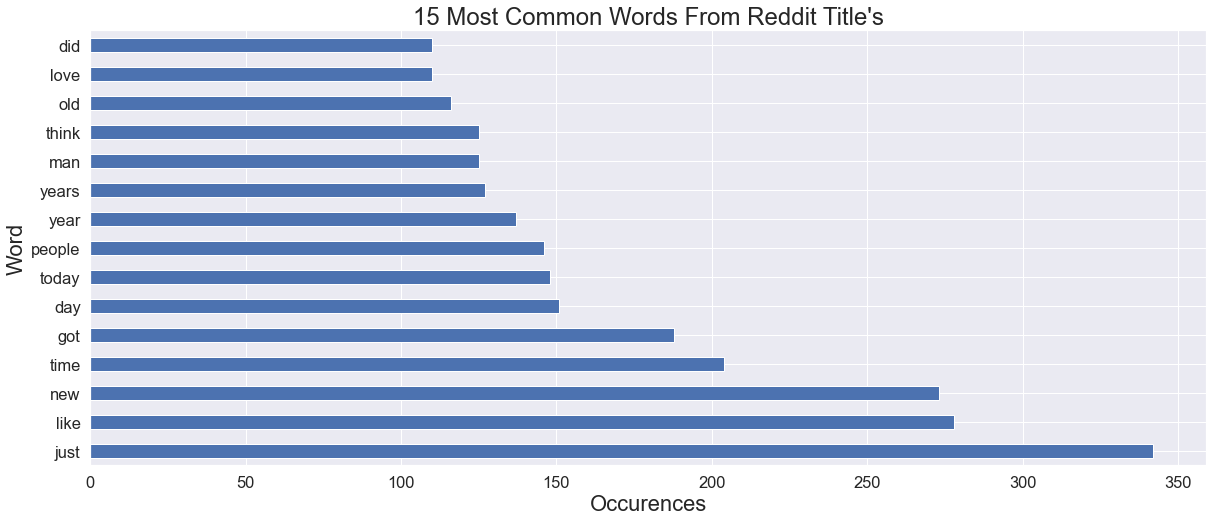

In [127]:
df_trial_1.sum().sort_values(ascending=False).head(15).plot(kind='barh');

plt.title("15 Most Common Words From Reddit Title's",fontsize=24)
plt.xlabel('Occurences',fontsize=22)
plt.ylabel('Word',fontsize=22);

sns.set(rc = {'figure.figsize':(20,8)});

sns.set(font_scale = 1.5)

### LogisticRegression Model On The Count Vectorized Data

In [47]:
lr = LogisticRegression()

lr.fit(X_train_cv,y_train)

lr.score(X_train_cv,y_train), lr.score(X_test_cv,y_test)

(0.9086578293289147, 0.5967691829760795)

In [48]:
X_test_cv.shape

(3219, 15752)

In [49]:
cross_val_score(lr,X_train_cv,y_train,cv=5)

array([0.56728778, 0.56499223, 0.59554635, 0.58001036, 0.58156396])

In [50]:
lr_preds = lr.predict(X_test_cv)

### Confusion Matrix
- Using a confusion matrix will allow for easy calculations and interpretations of the accuracy, precision, recall and f1 scores of our model

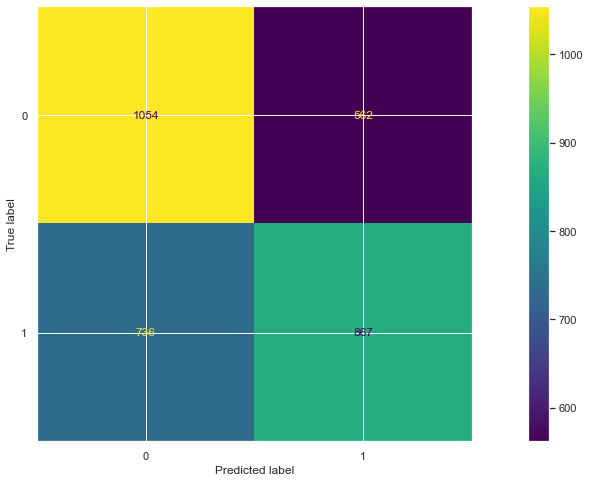

In [51]:
ConfusionMatrixDisplay.from_estimator(lr, X_test_cv, y_test); 

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

recall: The Ratio of correctly predicted positives to all positives in the dataset

precision: The ratio of correctly predicted positives to all predicted positives

True Positive - Posts accurately predicted

False Positive - Posts Predicted to be above median however aren't

False Negative - Posts predicted to be below median however are above median

True Negative - Posts below median

In [52]:
precision_cv = 1054 / (1054 + 562)
recall_cv = 1054 / (1054 + 736)
f1_cv = 2*(precision_cv*recall_cv) / (precision_cv+recall_cv)

In [53]:
print('Precision:', precision_cv)
print('Recall:', recall_cv)
print('F1 Score:', f1_cv)

Precision: 0.6522277227722773
Recall: 0.5888268156424581
F1 Score: 0.6189078097475045


## First Model - Count Vectorizer - Interpretation
- The initial test score ($r^2$) when using a count vectorizor with minimal hyperparameter tuning, accurately predicts 59% (1899 out of 3219 posts) of reddit posts for whether or not the comments on that post fall above or below the median (50 comments)
- The issue we see is our training score is accurately predicting 90% of the data, indicative that the model is overfit, we can begin to fix this issue by getting rid of excess features

- When viewing the confusion matrix of this model there are several interpretations to make. The recall, .59 means that 59% of predictions correctly predicted how many posts had comments above the median. To better expalain, if there were 200 posts and 100 of those posts had comment totals above the median, this model accurately predicted 59 of those 100 posts.
- The precision of the first model is .65 meaning that 65% of predicted comments above the median were predicted correct.

## Second Model
### Using TF-ID Vectorizer 
- We will tune the second model with more hyperparameters
- Limiting features by only selecting words that occur at least .008 (.8%) of the time.
- Additionally changing the ngram_range to be (1,2) instead of (1,1)
    - Vectorizer will interpret "They did what?!" as paired words ("They did", "did what") etc.
    - The vectorizer should have a better understanding of how our text works this way

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfid = TfidfVectorizer(stop_words='english',
                       max_df=.8,min_df=.008,
                       ngram_range=(1,2))

In [56]:
tfid.fit(X_train)

TfidfVectorizer(max_df=0.8, min_df=0.008, ngram_range=(1, 2),
                stop_words='english')

In [57]:
X_train_tfid = tfid.transform(X_train)
X_test_tfid = tfid.transform(X_test)

In [58]:
X_train_tfid.shape,X_test_tfid.shape

((9656, 34), (3219, 34))

In [59]:
df_trial_2 = pd.DataFrame(X_train_tfid.A, columns=tfid.get_feature_names_out())

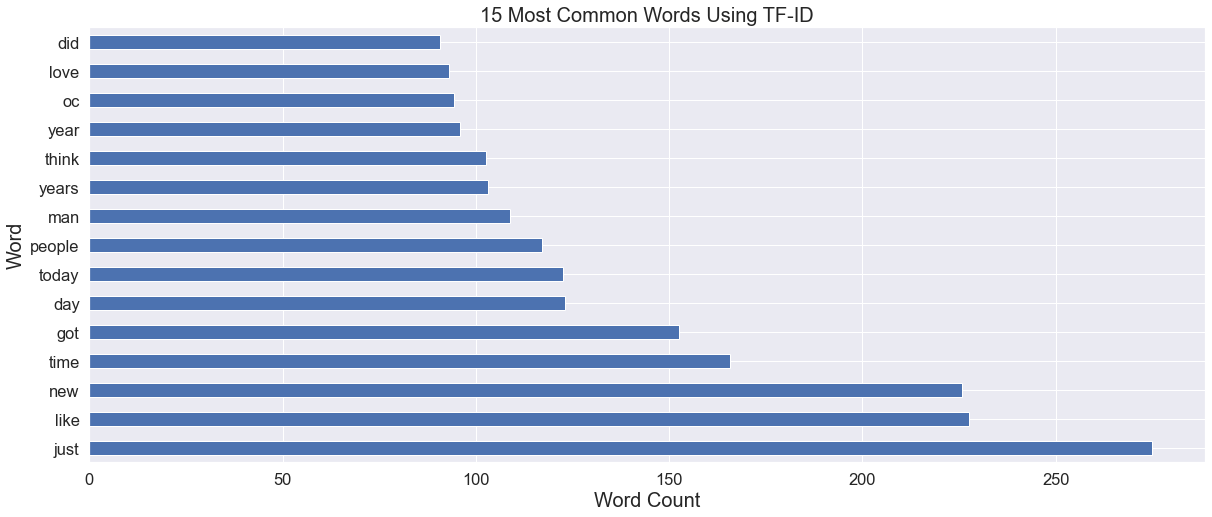

In [129]:
df_trial_2.sum().sort_values(ascending=False).head(15).plot(kind='barh')

plt.title('15 Most Common Words Using TF-ID',fontsize=20)
plt.xlabel('Word Count',fontsize=20)
plt.ylabel('Word',fontsize=20);

sns.set(font_scale = 1.5)

### Logistic Regression Model Using TF - ID Vectorizer

In [61]:
lr2 = LogisticRegression()

In [62]:
lr2.fit(X_train_tfid,y_train)

LogisticRegression()

In [63]:
lr2.score(X_train_tfid,y_train), lr2.score(X_test_tfid,y_test)

(0.5484672742336372, 0.5396085740913327)

In [64]:
cross_val_score(lr2,X_train_tfid,y_train,cv=5)

array([0.52173913, 0.53288452, 0.54893837, 0.54738477, 0.54945624])

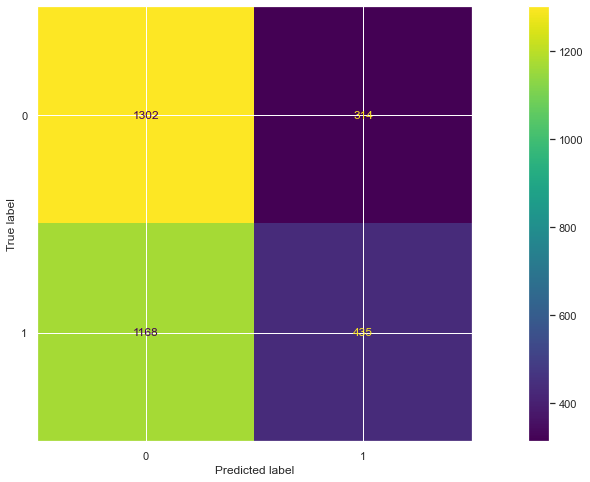

In [66]:
ConfusionMatrixDisplay.from_estimator(lr2, X_test_tfid, y_test);

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

recall: The Ratio of correctly predicted positives to all positives in the dataset

precision: The ratio of correctly predicted positives to all predicted positives

True Positive - Posts accurately predicted

False Positive - Posts Predicted to be above median however aren't

False Negative - Posts predicted to be below median however are above median

True Negative - Posts below median

In [67]:
precision_tfid = 1302 / (1302 + 314)
recall_tfid = 1302 / (1302 + 1168)
f1_tfid = 2*(precision_tfid*recall_tfid) / (precision_tfid+recall_tfid)

In [68]:
print('Precision:', precision_tfid)
print('Recall:', recall_tfid)
print('F1 Score:', f1_tfid)

Precision: 0.8056930693069307
Recall: 0.5271255060728745
F1 Score: 0.6372980910425845


### Second Model - TF-ID - Interpretation

- The second model using TF-ID and a few more hyperparameters gives us a model that is nowhere near as overfit if at all overfit compared to the first model which is good. The accuracy of the model, 54% is slightly less than the first model however given that this model isn't overfit, we can consider this model to be performing better.
- There are issues worth noting however first it is worth noting the precision of the model is 80%. 80% of posts predicted to be above the median were correcty predicted. However when viewing the False Negatives of the model, which are posts predicted to be below the median but are actually above the median, the model fails to capture a significant amount of posts that perform well. 1168 posts were predicted to fall below the median when in actuallity rise above the median. This is due to only using 34 features in the model from the hyperparameter tuning in the TF-ID. Having few features is bound to have the model miss posts that perform well.
- On the flip side, the false positive, posts predicted to be above the target however aren't, is better captured by this model. 314 posts were predicted to be above the target median however aren't. A smaller number is expected here as the model likely saw a feature or features present in the post however the post did not perform as well as predicted.

## Pipeline over TF-ID
- After learning what hyperparameters need tuning we can grid search over a pipeline to determine which parameters run best.
- We will tune the min_df to lower values to capture more features
- We will tune the max_features to a range of features to catch an appropriate value, we will not let the max features exceed 800 as to prevent overfitting

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [72]:
pipe = Pipeline([
    ('tf',TfidfVectorizer()),
    ('lr',LogisticRegression())
])

pipe_params = {
    'tf__min_df':[.002,.004,.006,.008],
    'tf__max_features':[100,300,500,800],
    'tf__ngram_range':[(1,1),(1,2),(1,3)],
    'tf__stop_words':['english'] }

gs = GridSearchCV(pipe, param_grid=pipe_params,
                  verbose=1)

gs.fit(X_train,y_train)
gs.score(X_train, y_train), gs.score(X_test, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(0.6140223695111847, 0.5716060888474681)

In [73]:
print('Best Score:',gs.best_score_)
gs.best_params_

Best Score: 0.564211250888575


{'tf__max_features': 500,
 'tf__min_df': 0.002,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': 'english'}

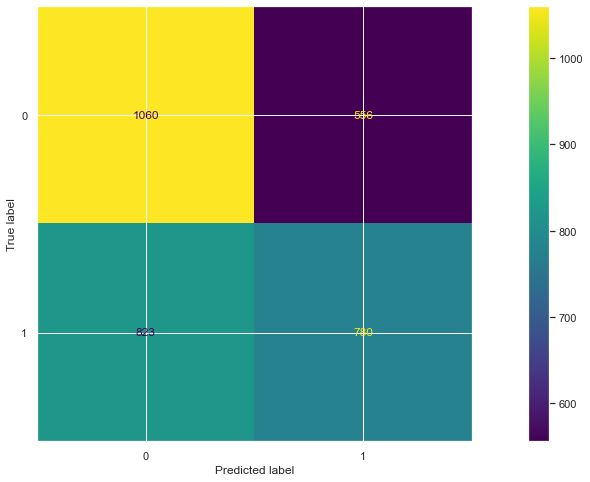

In [74]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test);

In [75]:
precision_gs = 1060 / (1060 + 556)
recall_gs = 1060 / (1060 + 823)
f1_gs = 2*(precision_gs*recall_gs) / (precision_gs+recall_gs)

print('Precision:', precision_gs)
print('Recall:', recall_gs)
print('F1 Score:', f1_gs)

Precision: 0.655940594059406
Recall: 0.562931492299522
F1 Score: 0.6058873963989712


In [133]:
pipe = Pipeline([
    ('tf',TfidfVectorizer()),
    ('rfc',RandomForestClassifier())
])

pipe_params = {
    'tf__min_df':[.0,.002,.008],
    'tf__max_features':[100,500],
    'tf__ngram_range':[(1,1),(1,2)],
    'tf__stop_words':['english'] }

gs = GridSearchCV(pipe, param_grid=pipe_params,
                  verbose=1)

gs.fit(X_train,y_train)
gs.score(X_train, y_train), gs.score(X_test, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


(0.7971209610604806, 0.5657036346691519)

In [134]:
print(gs.best_score_)
gs.best_params_

0.5752928411136593


{'tf__max_features': 500,
 'tf__min_df': 0.0,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

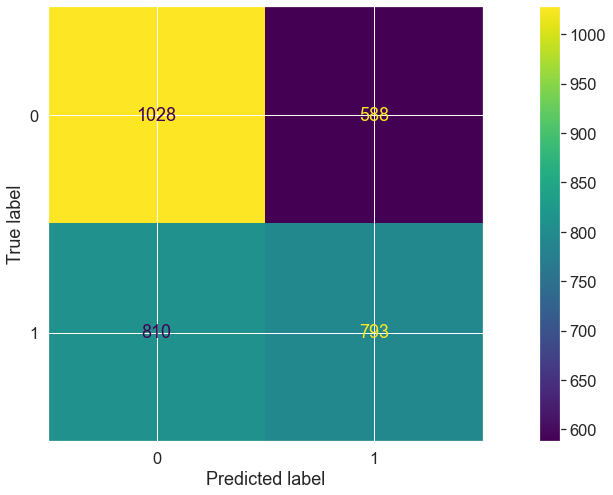

In [135]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test);

In [136]:
precision_gs2 = 1028 / (1028 + 588)
recall_gs2 = 1028 / (1028 + 810)
f1_gs2 = 2*(precision_gs2*recall_gs2) / (precision_gs2+recall_gs2)

print('Precision:', precision_gs2)
print('Recall:', recall_gs2)
print('F1 Score:', f1_gs2)

Precision: 0.6361386138613861
Recall: 0.55930359085963
F1 Score: 0.5952518818760858


## GridSearch - Model 3 - Interpretation

**Logisitic Regression**
- The Recall tells us that we are accurately predicting 56% of our predicted posts above the target. Additionally the model is not overfit and has an accuracy of 57% when predicting whether a post will rise above or below the comment median. This is our best running model as of now.

**RandomForestClassifier**
- The RFC Model wants to keep extracting as many features as possible, this will result in an overfit model which can be seen with the training score of .79 and test score of .57 and this is ran under hyperparameter tuning with attempts to prevent overfitting.

## Defining Subreddits With Highest Total Score
- In attempt to get a more accurate model, we are going to test soley on the subreddits with the highest total scores. 
- Ideally we run a stronger model on our new DataFrame and translate the features of the new model to the original DataFrame

In [78]:
df.groupby('sub').sum()[['score','comments']].sort_values(by='score',ascending=False).head()

,score,comments
sub,,
memes,68241166,501291
pics,53765768,1425229
funny,28574130,454182
aww,23747016,256172
nextfuckinglevel,18695545,292842


In [79]:
top_subs = df.loc[df['sub'].isin(['memes','pics','funny','aww','nextfuckinglevel'])]

### Creating New Median Column

In [80]:
top_subs.describe()

,title_length,score,comments,above_median
count,1565.000000,1565.000000,1565.000000,1565.000000
mean,50.337380,123337.779553,1872.023003,0.876677
std,43.527543,62974.925969,2096.187352,0.328912
min,7.000000,71.000000,1.000000,0.000000
25%,20.000000,128092.000000,635.000000,1.000000
50%,35.000000,137662.000000,1311.000000,1.000000
75%,68.000000,155227.000000,2401.000000,1.000000
max,299.000000,369073.000000,26560.000000,1.000000


In [81]:
topsubs_median_comments = [1 if each > 1311 else 0 for each in top_subs.comments]
top_subs['above_median'] = topsubs_median_comments

/var/folders/pj/j8qg9t055bx9yt_m61ngrhyh0000gn/T/ipykernel_2792/2329479427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_subs['above_median'] = topsubs_median_comments


In [82]:
top_subs

,sub,title,title_length,score,comments,created,above_median
3,aww,Loving the water.,17,13717,112,2022-08-29 19:47:36,0
7,nextfuckinglevel,I fly racing drones for a living and i chased ...,100,46305,903,2022-08-29 18:05:24,0
15,memes,Nature can be so beautiful sometimes,36,25782,94,2022-08-29 17:17:11,0
31,funny,Looks like a Survey Pilot's last day today,42,4392,121,2022-08-29 20:34:03,0
98,pics,[OC] I made this Heisenberg drawing after watc...,82,27420,698,2022-08-29 12:50:56,0
...,...,...,...,...,...,...,...
16855,memes,I need to know how he conducts the break up,43,550,10,2022-09-01 08:02:33,0
16858,memes,amogus.,7,99,4,2022-09-01 17:20:34,0
16863,memes,Only wrong answers,18,101,322,2022-09-01 18:02:30,0
16866,memes,Call it,7,302,13,2022-09-01 11:09:58,0


In [83]:
top_subs.above_median.value_counts(normalize=True)

0    0.500319
1    0.499681
Name: above_median, dtype: float64

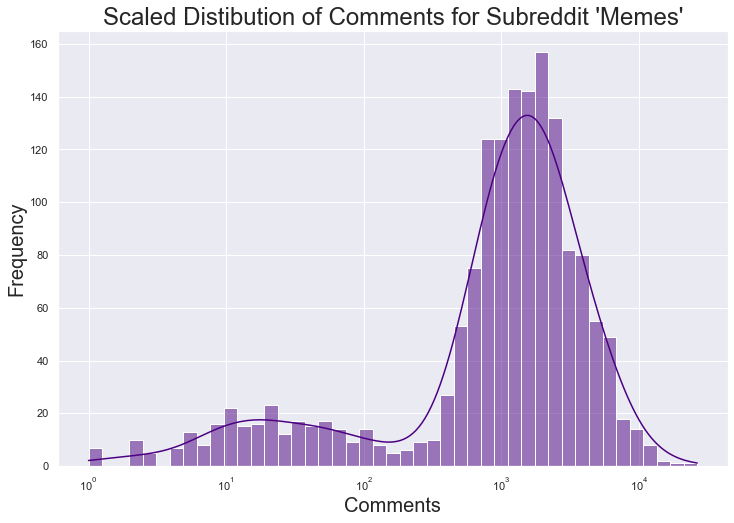

In [85]:
ax = sns.histplot(top_subs.comments,kde=True,
                  log_scale=True,color='indigo',
                  bins=45)

ax.set_title("Scaled Distibution of Comments for Subreddit 'Memes'",fontsize=24)
ax.set_xlabel('Comments', fontsize=20);
ax.set_ylabel('Frequency', fontsize=20);

sns.set(rc = {'figure.figsize':(12,8)});

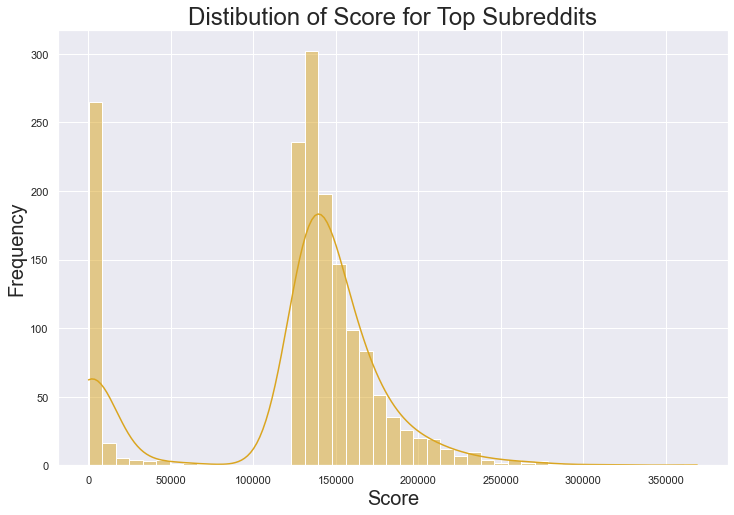

In [86]:
ax = sns.histplot(top_subs.score,color='goldenrod',kde=True,
             bins=45);

ax.set_title("Distibution of Score for Top Subreddits",fontsize=24)
ax.set_xlabel('Score', fontsize=20);
ax.set_ylabel('Frequency', fontsize=20);

sns.set(rc = {'figure.figsize':(12,8)});

- The comments however are highest in frequency near 1000-2000 comments. The median of comments in these subreddits are also much closer to the mean compared to the entirety of the data
- The scores of these subreddits are our top scoring subreddits therefore we are viewing that volatile spike mentioned earlier
- As of now:
    - Comments:
    - `Mean: 1311`
    - `Median: 1872`

## Train Test Split

In [140]:
X = top_subs['title']
y = top_subs.above_median

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

In [88]:
print(X_train.shape, X_test.shape)
y_test.value_counts(normalize=True)

(1173,) (392,)


1    0.5
0    0.5
Name: above_median, dtype: float64

In [89]:
tf = TfidfVectorizer(stop_words='english')
tf.fit(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

In [90]:
top_subs_df = pd.DataFrame(X_train_tf.A, columns=tf.get_feature_names_out())

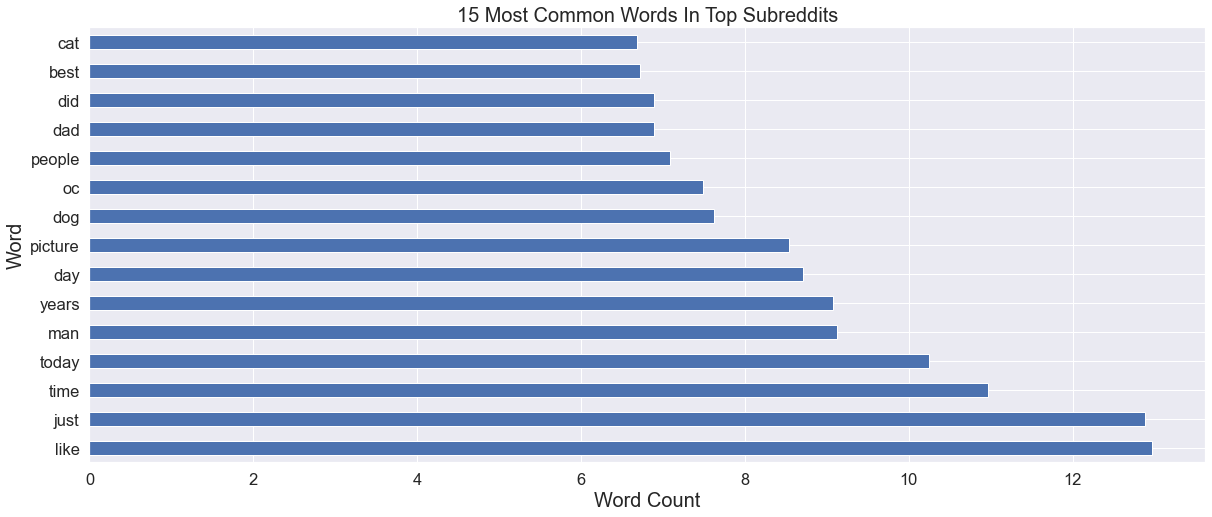

In [137]:
top_subs_df.sum().sort_values(ascending=False).head(15).plot(kind='barh')

plt.title('15 Most Common Words In Top Subreddits',fontsize=20)
plt.xlabel('Word Count',fontsize=20)
plt.ylabel('Word',fontsize=20);

sns.set(rc = {'figure.figsize':(20,10)});

sns.set(font_scale = 1.5)

## Modeling
- We run several models in attempt to find a model that runs best
- All models use TFIDVectorizer

### Random Forest

In [93]:
pipe = Pipeline([
    ('tf',TfidfVectorizer()),
    ('rfc',RandomForestClassifier())
])

pipe_params = {
    'tf__min_df':[.0,.002,.006],
    'tf__max_features':[100,700,1500],
    'tf__ngram_range':[(1,1),(1,2),(1,3)],
    'tf__stop_words':['english'] }

gs = GridSearchCV(pipe, param_grid=pipe_params,
                  verbose=1)

gs.fit(X_train,y_train)
gs.score(X_train, y_train), gs.score(X_test, y_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


(0.9130434782608695, 0.5867346938775511)

In [94]:
print('Best Score:',gs.best_score_)
gs.best_params_

Best Score: 0.6589670849245317


{'tf__max_features': 1500,
 'tf__min_df': 0.002,
 'tf__ngram_range': (1, 2),
 'tf__stop_words': 'english'}

### Decision Tree

In [95]:
from sklearn.tree import export_text, DecisionTreeClassifier, plot_tree
pipe = Pipeline([
    ('tf',TfidfVectorizer()),
    ('dtc',DecisionTreeClassifier())
])

pipe_params = {
    'tf__min_df':[.002,.004,.006,.008],
    'tf__max_features':[100,300,500,800],
    'tf__ngram_range':[(1,1),(1,2),(1,3)],
    'tf__stop_words':['english'] }

gs = GridSearchCV(pipe, param_grid=pipe_params,
                  verbose=1)

gs.fit(X_train,y_train)
gs.score(X_train, y_train), gs.score(X_test, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(0.9130434782608695, 0.6071428571428571)

In [96]:
print('Best Score:',gs.best_score_)
gs.best_params_

Best Score: 0.6555446444808146


{'tf__max_features': 800,
 'tf__min_df': 0.002,
 'tf__ngram_range': (1, 1),
 'tf__stop_words': 'english'}

### Logistic Regression

In [141]:
pipe = Pipeline([
    ('tf',TfidfVectorizer()),
    ('lreg',LogisticRegression())
])

pipe_params = {
    'tf__min_df':[.002,.004,.006,.008],
    'tf__max_features':[100,300,500,800],
    'tf__ngram_range':[(1,1),(1,2),(1,3)],
    'tf__stop_words':['english']}

gs = GridSearchCV(pipe, param_grid=pipe_params,
                  verbose=1)

gs.fit(X_train,y_train)
gs.score(X_train, y_train), gs.score(X_test, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


(0.8235294117647058, 0.6326530612244898)

In [98]:
print('Best Score:',gs.best_score_)
gs.best_params_

Best Score: 0.672598654300782


{'tf__max_features': 800,
 'tf__min_df': 0.002,
 'tf__ngram_range': (1, 3),
 'tf__stop_words': 'english'}

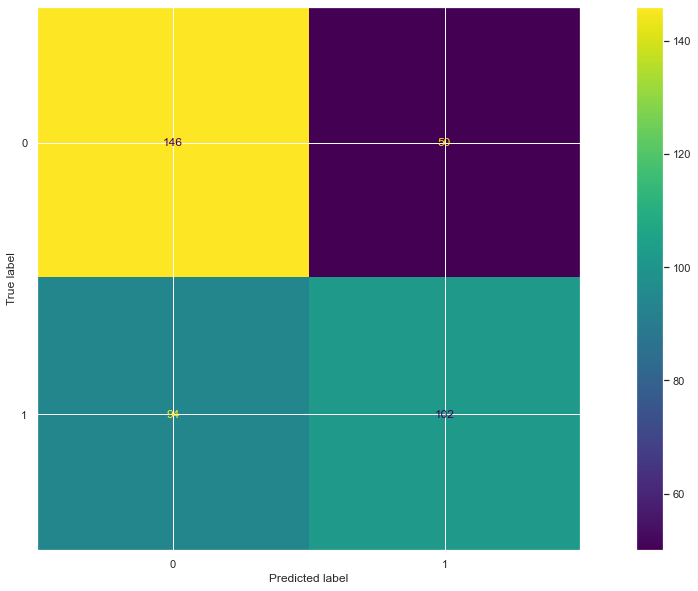

In [100]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test);

In [138]:
precision_gs3 = 146 / (146 + 50)
recall_gs3 = 146 / (146 + 94)
f1_gs3 = 2*(precision_gs3*recall_gs3) / (precision_gs3+recall_gs3)

print('Precision:', precision_gs3)
print('Recall:', recall_gs3)
print('F1 Score:', f1_gs3)

Precision: 0.7448979591836735
Recall: 0.6083333333333333
F1 Score: 0.6697247706422018


In [176]:
df_trial_2.sum().sort_values(ascending=False).head(20)

just      274.906985
like      227.528163
new       225.657232
time      165.681941
got       152.531203
day       123.026243
today     122.597787
people    117.038322
man       108.771124
years     103.231165
think     102.688732
year       95.789029
oc         94.342706
love       92.936679
did        90.822518
don        87.138720
game       84.872234
good       84.466052
going      82.597442
old        82.463657
dtype: float64

In [175]:
top_subs_df.sum().sort_values(ascending=False).head(20)

like       12.971177
just       12.876546
time       10.960086
today      10.250620
man         9.121956
years       9.075965
day         8.707382
picture     8.540744
dog         7.623345
oc          7.482287
people      7.082967
dad         6.892556
did         6.891423
best        6.713533
cat         6.685492
old         6.539260
life        6.454698
right       6.382542
took        6.216213
kid         6.172216
dtype: float64

## Top Subreddits Models Interpretation:
- Our best scoring model is the logistic regression model

- When comparing the top 10 words from the top_subs and original dataframes, we see that 8 of the top 10 words are the same. The other two words are likely due to the specificity of the subreddit themselves. While the model performs better on the smaller subreddit, I do not believe it will be translatable to the original data itself as the performance isn't inspiringly better.

## Misclassification

In [169]:
misclass = X_test.copy()
misclass = pd.DataFrame(misclass)
misclass['actual'] = y_test
misclass['predicted'] = gs.predict(X_test)
misclass['title_length'] = [len(each) for each in misclass.title]

In [190]:
pd.options.display.max_colwidth = 100
misclass[misclass['actual'] != misclass['predicted']].sort_values(by='title_length',ascending=False).head(10)

,title,actual,predicted,title_length
7437,22-year-old Iranian here. Just wanted to share my love with my friends all over the world (Ameri...,1,0,205
9630,I'm a quadriplegic and I've been using exoskeleton recently. My physical therapist is holding me...,1,0,194
9258,"For 30 years, Mr. Hinton was stripped of all his rights while he sat on Alabama death row for a ...",0,1,190
8448,"This Turkish bride and groom chose their wedding banquet to serve food to 4,000 Syrian refugees ...",0,1,155
8477,"Ricky Gervais to celebrities at the Golden Globes: ""You're in no position to lecture the public ...",1,0,151
8891,I'm no longer banned from playing in magic tournaments. I have risen from the ashes to defend my...,1,0,151
9208,I came in to the office early and switched as many M and N keys on keyboards as I could. Some mi...,1,0,146
7767,"I've been photoshopping my kid into marginally dangerous situations. Nothing unbelievable, but e...",1,0,140
9451,School custodian casually walking through the gym with no one watching but the security camera a...,0,1,127
7315,"Private Internet Access, a VPN provider, takes out a full page ad in The New York Time calling o...",1,0,111


In [189]:
misclass.describe()

,actual,predicted,title_length
count,392.000000,392.000000,392.000000
mean,0.500000,0.387755,50.635204
std,0.500639,0.487861,43.631356
min,0.000000,0.000000,7.000000
25%,0.000000,0.000000,19.000000
50%,0.500000,0.000000,36.000000
75%,1.000000,1.000000,69.250000
max,1.000000,1.000000,279.000000


In [188]:
misclass.predicted.value_counts(normalize=True)

0    0.612245
1    0.387755
Name: predicted, dtype: float64

In [198]:
misclass[misclass.title_length > 50].predicted.value_counts(normalize=True)

1    0.613139
0    0.386861
Name: predicted, dtype: float64

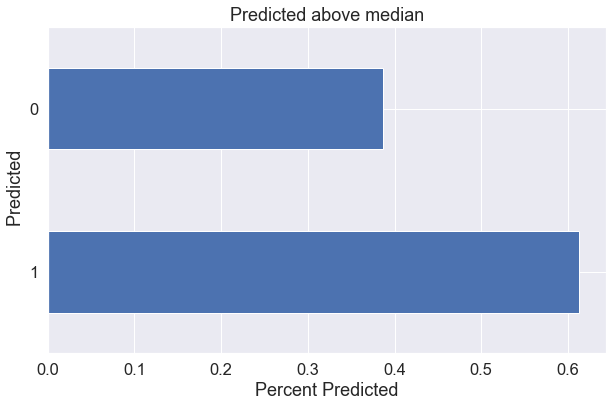

In [212]:
misclass[misclass.title_length > 50].predicted.value_counts(normalize=True).plot(kind='barh');

plt.title('Predicted above median');
plt.xlabel('Percent Predicted')
plt.ylabel(' Predicted');

sns.set(rc = {'figure.figsize':(10,6)});

sns.set(font_scale = 1.5)

In [199]:
misclass[misclass.title_length > 50].actual.value_counts(normalize=True)

1    0.80292
0    0.19708
Name: actual, dtype: float64

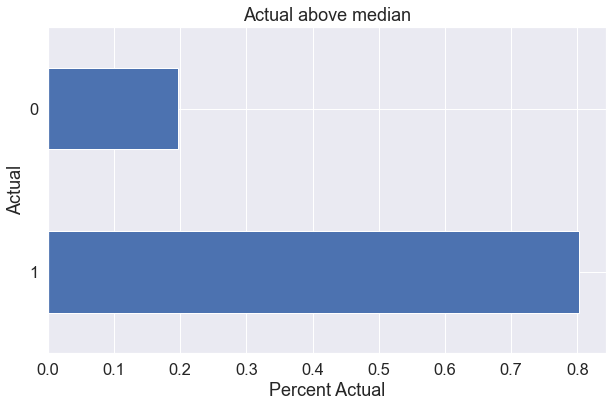

In [215]:
misclass[misclass.title_length > 50].actual.value_counts(normalize=True).plot(kind='barh');

plt.title('Actual above median');
plt.xlabel('Percent Actual')
plt.ylabel('Actual');

sns.set(rc = {'figure.figsize':(10,6)});

sns.set(font_scale = 1.5)

### Posts that have longer title lengths, measured by above the mean, in actuallity run above the comment median 80% of the time whereas when predicting these posts only 61% are predicted to run above the mean. 20% of posts are missed

## Conclusions and Recommendations

### Trade-Off Table: Best Models

|Model_Number|Model_Type|Accuracy|Precision|Recall|Overfit?|
|------------|----------|--------|---------|------|--------|
|Model_1|Log-Reg|60%|65%|58%|Yes|
|Model_2|Log-Reg|54%|80%|53%|No|
|Model_3|Log-Reg|57%|66%|56%|No|
|Model_4|Random-Forest|57%|64%|56%|Yes|
|Model_5|Log-Reg|64%|74%|64%|Yes|

### Conclusions
Our problem statement was to identify which characteristics of a post on Reddit are most predictive of the overall interaction on a thread as measured by the median number of comments.

After running several models we can conclude:
- Model 2 is best used if attempting to write a post which attracts attention
    - Utilizes Precision
- Model 3 is best used if trying to view or learn from submissions where comments are accurately predicted to rise above or fall below the median.
    - Utilizes Recall
- Logisitc regression models consistently performed best whereas Random Forest and Decision Trees were constantly overfit

### Recommendations
- Our last model which was run on the top subreddits runs the best. 
- Models on the top scoring subreddits indicate initial models are very good at predicting submissions with comments on the higher end of the distribution spectrum. 
- The issue is that the model isn't significantly better than any of the models ran with the entirety of the data and many features are the exact same. 
- However the model performing better indicates we could use similar methods to run a model on the entirety of the data that performs best.
- Given more time, incorporate title lengths as a feature and see what is found since our top scoring subreddit there is a significant impact of title length